In [1]:
import os
import pandas as pd
import nltk
%matplotlib inline

In [2]:
# Initial imports
import os
from path import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\boitz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")


Total articles about Bitcoin: 4447


In [7]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")


Total articles about Ethereum: 941


In [8]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)
bitcoin_df = create_df(bitcoin_headlines["articles"], "en")
ethereum_df =create_df(ethereum_headlines["articles"], "en")


In [9]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


date                                               text  compound  \
0  2019-11-03  Less than two miles from Icelands Reykjavik ai...   -0.1531   
1  2019-11-20  Whether Bitcoin, an immaterial resource derive...    0.2999   
2  2019-11-01  High school students in France may be among th...    0.0000   
3  2019-10-27  Our robot colleague Satoshi Nakaboto writes ab...    0.5070   
4  2019-11-07  Our robot colleague Satoshi Nakaboto writes ab...    0.1725   

   positive  negative  neutral  
0     0.000     0.039    0.961  
1     0.104     0.100    0.796  
2     0.000     0.000    1.000  
3     0.069     0.000    0.931  
4     0.066     0.052    0.882

In [10]:
# Create the ethereum sentiment scores DataFrame


ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

date                                               text  compound  \
0  2019-11-20  Sharding and scalability. Transactions per sec...    0.3595   
1  2019-10-24  Disrupt Berlin is right around the corner. And...    0.6249   
2  2019-10-23  he plaBy now, you should almost certainly know...    0.4601   
3  2019-11-01  Blockchain has been picking up the pace since ...   -0.3089   
4  2019-10-23  Reuters\r\n<ul><li>Bitcoin slumped as much as ...   -0.3818   

   positive  negative  neutral  
0     0.055     0.000    0.945  
1     0.100     0.000    0.900  
2     0.085     0.000    0.915  
3     0.000     0.055    0.945  
4     0.000     0.066    0.934

In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

compound   positive   negative    neutral
count  97.000000  97.000000  97.000000  97.000000
mean    0.147286   0.062732   0.041268   0.896021
std     0.437430   0.053257   0.055406   0.076462
min    -0.831600   0.000000   0.000000   0.640000
25%    -0.077200   0.000000   0.000000   0.847000
50%     0.202300   0.066000   0.000000   0.916000
75%     0.507000   0.088000   0.069000   0.945000
max     0.914100   0.249000   0.271000   1.000000

In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


compound   positive   negative    neutral
count  95.000000  95.000000  95.000000  95.000000
mean    0.167825   0.055453   0.027432   0.917116
std     0.400953   0.053101   0.049107   0.071040
min    -0.877900   0.000000   0.000000   0.551000
25%     0.000000   0.000000   0.000000   0.892000
50%     0.250000   0.057000   0.000000   0.931000
75%     0.468400   0.095500   0.046500   0.954500
max     0.757900   0.239000   0.287000   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a larger mean positive score but the difference was very marginal.

Q: Which coin had the highest compound score?

A: On this day Ethereum had a higher compound score. This could be because Bitcoin has a significant drop in price the day previous to me running the query for headlines

Q. Which coin had the highest positive score?

A: Bitcoin had a highest postitive score of .249 comapred to Ethereum's highest postive score of .239

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary

sw_addon = {'ha', 'char', 'every', 'has', 'have', 'had', 'colleague'}

In [15]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
            
    return tokens

In [16]:
bitcoin_tokens = bitcoin_df.copy()

In [17]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [18]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df
bitcoin_tokens.head()

date                                               text  compound  \
0  2019-11-03  Less than two miles from Icelands Reykjavik ai...   -0.1531   
1  2019-11-20  Whether Bitcoin, an immaterial resource derive...    0.2999   
2  2019-11-01  High school students in France may be among th...    0.0000   
3  2019-10-27  Our robot colleague Satoshi Nakaboto writes ab...    0.5070   
4  2019-11-07  Our robot colleague Satoshi Nakaboto writes ab...    0.1725   

   positive  negative  neutral  \
0     0.000     0.039    0.961   
1     0.104     0.100    0.796   
2     0.000     0.000    1.000   
3     0.069     0.000    0.931   
4     0.066     0.052    0.882   

                                         tokens_text  
0  [less, two, mile, icelands, reykjavik, airport...  
1  [whether, bitcoin, immaterial, resource, deriv...  
2  [high, school, student, france, may, among, fi...  
3  [robot, satoshi, nakaboto, writes, bitcoin, fu...  
4  [robot, satoshi, nakaboto, writes, bitcoin, bt...

In [19]:
# Create a new tokens column for ethereum
ethereum_tokens = ethereum_df.copy()

In [20]:
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [21]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [22]:
ethereum_tokens.head()

date                                               text  compound  \
0  2019-11-20  Sharding and scalability. Transactions per sec...    0.3595   
1  2019-10-24  Disrupt Berlin is right around the corner. And...    0.6249   
2  2019-10-23  he plaBy now, you should almost certainly know...    0.4601   
3  2019-11-01  Blockchain has been picking up the pace since ...   -0.3089   
4  2019-10-23  Reuters\r\n<ul><li>Bitcoin slumped as much as ...   -0.3818   

   positive  negative  neutral  \
0     0.055     0.000    0.945   
1     0.100     0.000    0.900   
2     0.085     0.000    0.915   
3     0.000     0.055    0.945   
4     0.000     0.066    0.934   

                                         tokens_text  
0  [sharding, scalability, transactions, per, sec...  
1  [disrupt, berlin, right, around, corner, plent...  
2  [plaby, almost, certainly, know, ethereum, eth...  
3  [blockchain, picking, pace, since, inception, ...  
4  [reutersullibitcoin, slumped, much, wednesday,...

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [25]:
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [26]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [27]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [28]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [29]:
bigram_counter(bitcoin_sent)

Bigram  Count
0    (satoshi, nakaboto)     36
1         (bitcoin, btc)     26
2       (robot, satoshi)     18
3     (nakaboto, writes)     18
4      (writes, bitcoin)     18
5  (fucking, daywelcome)     18
6  (daywelcome, another)     18
7     (another, edition)     18
8     (edition, bitcoin)     18
9       (bitcoin, today)     18

In [30]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_sent)

Bigram  Count
0          (early, morning)     11
1         (ethereum, ended)     10
2           (saw, ethereum)      9
3       (morning, intraday)      9
4              (ended, day)      9
5              (start, day)      8
6                (day, saw)      8
7          (intraday, high)      7
8           (price, action)      5
9  (ethereumethereum, fell)      5

In [31]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [32]:
# Get the top 10 words for Bitcoin
token_count(all_bitcoin_words)

Word  Count
0         bitcoin     96
1         satoshi     39
2        nakaboto     36
3  cryptocurrency     31
4             btc     28
5            past     21
6             say     21
7         another     20
8           today     20
9          writes     19

In [33]:
# Get the top 10 words for Ethereum
token_count(all_eth_words)

Word  Count
0        ethereum     65
1      blockchain     26
2             day     26
3         bitcoin     25
4  cryptocurrency     20
5         morning     16
6           price     14
7            week     13
8           early     12
9         startup     10

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [35]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [36]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

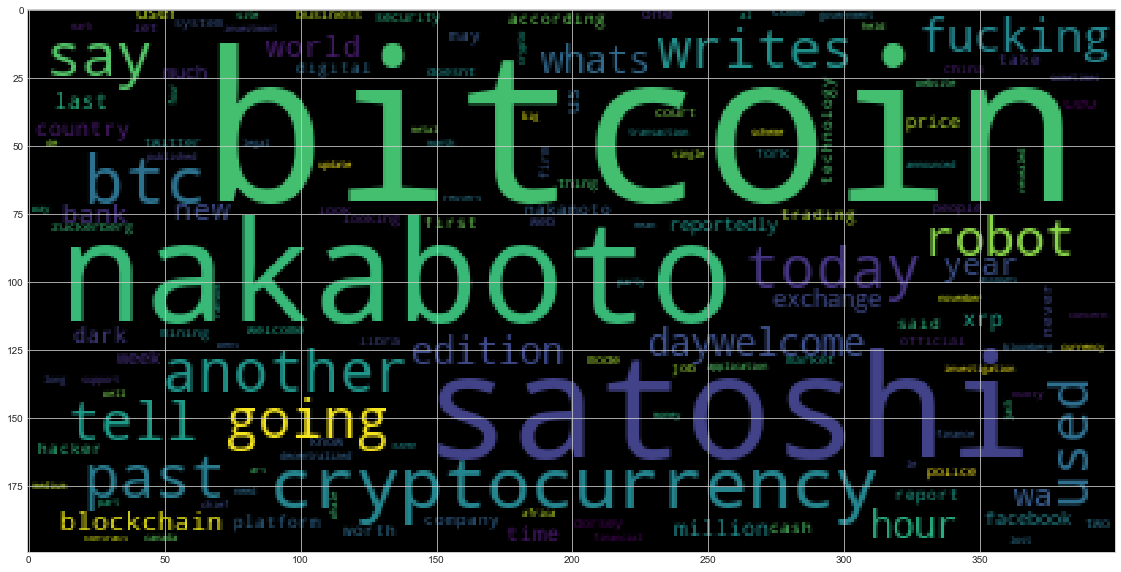

In [37]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.show()

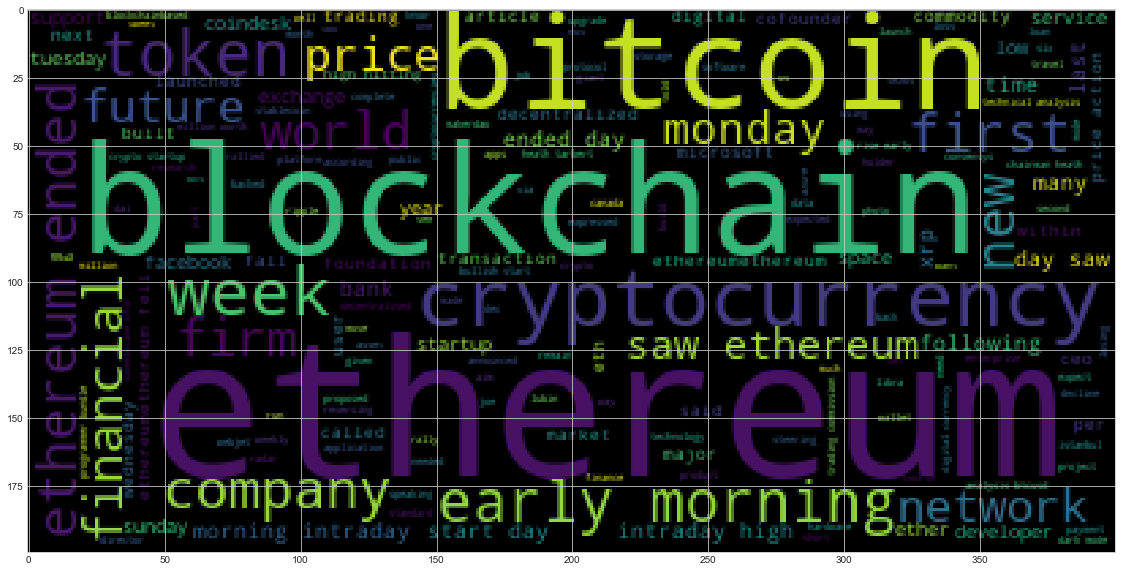

In [38]:
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [39]:
import spacy
from spacy import displacy

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [41]:
# Concatenate all of the bitcoin text together
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)

In [42]:
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin Name Entity Recognition'
displacy.render(bitcoin_doc, style='ent')

In [48]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Less than two miles QUANTITY
Icelands Reykjavik FAC
tens of thousands CARDINAL
Bitcoin GPE
Abkhazia GPE
France GPE
first ORDINAL
French NORP
Le Ministère de lÉducation Nationale ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Baudriallard PERSON
only one CARDINAL
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Isaac Newton PERSON
Jack Dorsey PERSON
Bitcoin GPE
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin GPE
Africa LOC
Nigeria GPE
Ghana GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PER

---

## Ethereum NER

In [49]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)


In [50]:
# Run the NER processor on all of the text

eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum Named Entity Recogition'
displacy.render(eth_doc, style='ent')

In [52]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Disrupt Berlin PERSON
December 11 and December 12 DATE
ETH ORG
second ORDINAL
Blockchain GPE
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto ORG
Bitcoin PERSON
Blockchai GPE
+9390 ORG
Reuters
 ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg PERSON
Swiss NORP
Swiss NORP
Block PERSON
$400 million MONEY
Ripple XRP PERSON
XRP ORG
Ponzi PERSON
XRP ORG
London GPE
less than 0.2 percent PERCENT
XRP ORG
The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Logic WORK_OF_ART
The Royal Bank of Canada ORG
Opera PERSON
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
Ripple XRP PERSON
XRP ORG
Bitcoin GPE
XRP PERSON
third ORDINAL
Rainn Wilson PERSON
Bitcoin BTC FAC
the Mona Foundation ORG
Blockchain GPE
Bitcoin GPE
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
Bejing ORG
first ORDINAL
public last week DATE
Chinese NORP
2021 DATE
first